In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_66.jpg
/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_21.jpg
/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_64.jpg
/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_33.jpg
/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_51.jpg
/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_61.jpg
/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_9.jpg
/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_38.jpg
/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_58.jpg
/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation/Healthy/S_72.jpg
/kaggle/inp

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

FOLDER PATHS

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
lung_labels = ['cancer','no_cancer']
for i in lung_labels:
    folderPath = os.path.join('/kaggle/input/lung-cancer-mri-images/lung_cancer_MRI_dataset/train', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in lung_labels:
    folderPath = os.path.join("/kaggle/input/lung-cancer-mri-images/lung_cancer_MRI_dataset/validate", i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
breast_labels = ['Healthy','Sick']
for i in breast_labels:
    folderPath = os.path.join("/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/train", i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in breast_labels:
    folderPath = os.path.join("/kaggle/input/breast-cancer-patients-mris/Breast Cancer Patients MRI's/validation", i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
# Convert to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Verify lengths
print("Number of images:", len(X_train))
print("Number of labels:", len(Y_train))

Number of images: 8424
Number of labels: 8424


In [5]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(8424, 150, 150, 3)

TRAIN TEST SPLIT

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

In [7]:
# Preprocess the input data using VGG16's preprocessing function
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [8]:
import numpy as np
import tensorflow as tf

# Define all unique labels
all_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor', 'cancer', 'no_cancer', 'Healthy', 'Sick']

# Create a mapping from label names to indices
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

# Convert y_train from string labels to numerical indices
y_train_indices = [label_to_index[label] for label in y_train]  # Convert string labels to indices
y_train = np.array(y_train_indices)  # Convert list to numpy array

# Convert y_test from string labels to numerical indices
y_test_indices = [label_to_index[label] for label in y_test]  # Convert string labels to indices
y_test = np.array(y_test_indices)  # Convert list to numpy array

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(all_labels))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(all_labels))

In [9]:
print("y_train shape after one-hot encoding:", y_train.shape)
print("y_test shape after one-hot encoding:", y_test.shape)
print("Sample values in y_train after encoding:", y_train[:10])
print("Sample values in y_test after encoding:", y_test[:10])

y_train shape after one-hot encoding: (7581, 8)
y_test shape after one-hot encoding: (843, 8)
Sample values in y_train after encoding: [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
Sample values in y_test after encoding: [[0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


CONVOLUTIONAL NUERAL NETWORK

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load ResNet50 without the top fully connected layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base layers
base_model.trainable = False

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(all_labels), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 24,903,560 (95.00 MB)

 Trainable params: 1,315,848 (5.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50


I0000 00:00:1733678701.407264      68 service.cc:145] XLA service 0x7869640031c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733678701.407327      68 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  5/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3456 - loss: 2.3477

I0000 00:00:1733678709.324969      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


214/214 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - accuracy: 0.6218 - loss: 1.0394 - val_accuracy: 0.7325 - val_loss: 0.6348
Epoch 2/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7741 - loss: 0.5212 - val_accuracy: 0.7800 - val_loss: 0.5055
Epoch 3/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8173 - loss: 0.4400 - val_accuracy: 0.7852 - val_loss: 0.4843
Epoch 4/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8284 - loss: 0.3965 - val_accuracy: 0.8485 - val_loss: 0.3668
Epoch 5/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8455 - loss: 0.3590 - val_accuracy: 0.8393 - val_loss: 0.3802
Epoch 6/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8518 - loss: 0.3403 - val_accuracy: 0.8195 - val_loss: 0.4027
Epoch 7/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8678 - loss: 0.2940 - val_accuracy: 0.8432 - val_loss: 0.3570
Epoch 8/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8710 - loss: 0.2968 - val_accuracy: 0.86

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

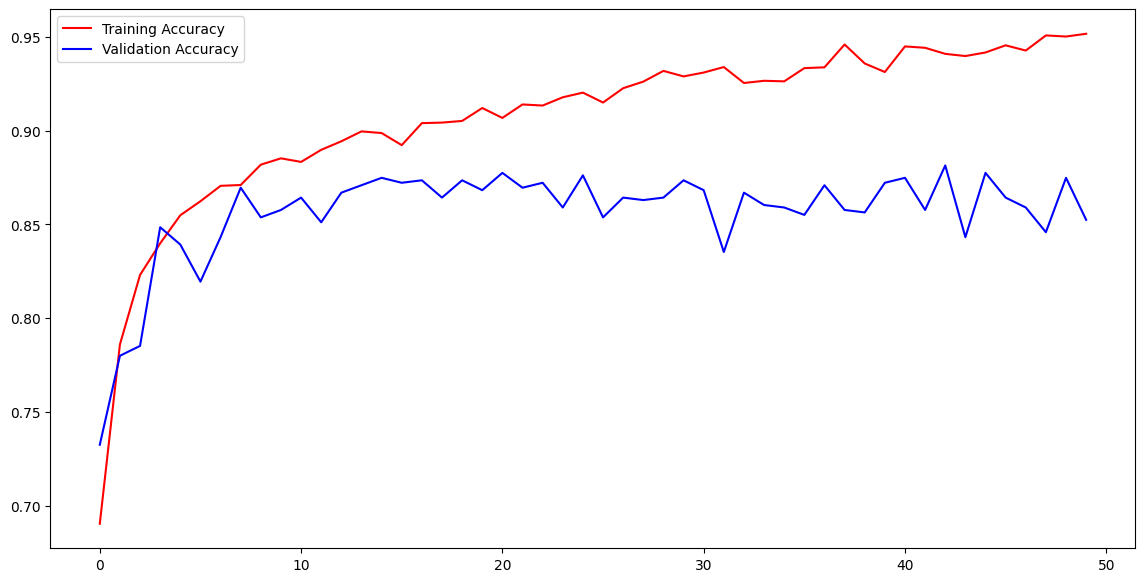

In [15]:
model.save('uairesnet50.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

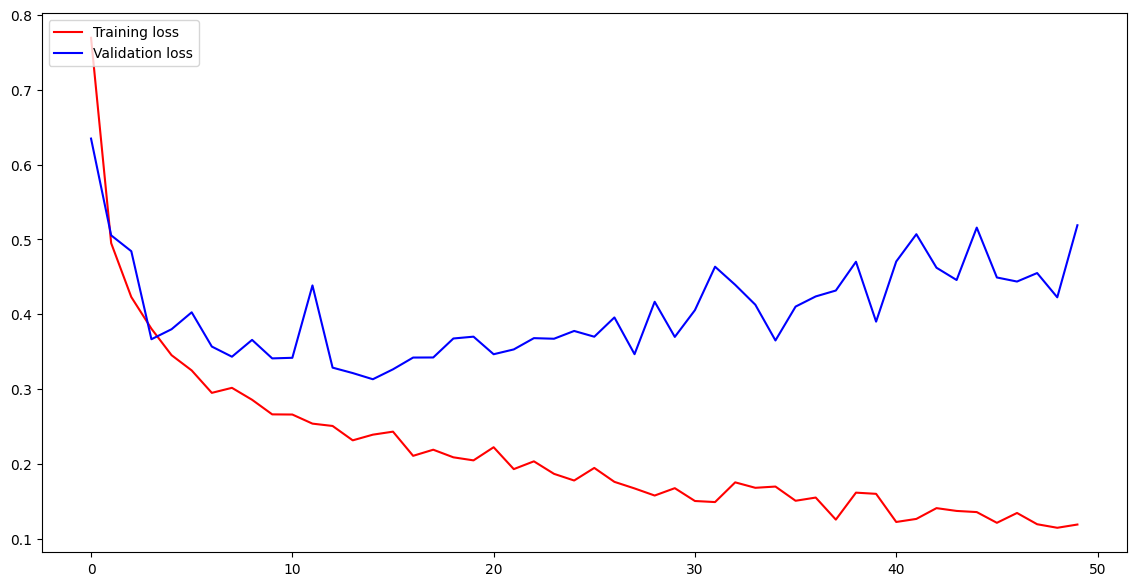

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

PREDICTION

In [17]:
img = cv2.imread("/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(100).jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [18]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

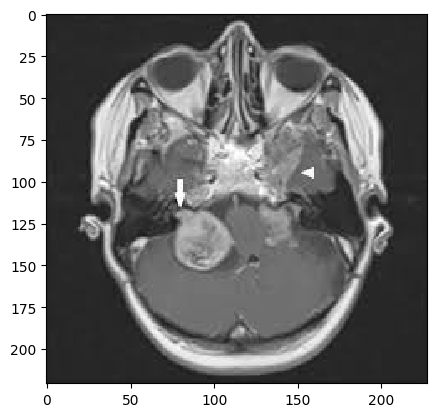

In [19]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(100).jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [20]:
a = model.predict(img_array)
indices = a.argmax()
print("Predicted class index:", indices)
print("Predicted class label:", all_labels[indices])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class index: 1
Predicted class label: meningioma_tumor


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)  # Get probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integers

27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step


In [23]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=all_labels))

# Sensitivity (Recall) for each class
cm = confusion_matrix(y_true, y_pred)
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensitivity (Recall) for each class:", sensitivity)

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.97      0.90      0.93        99
meningioma_tumor       0.84      0.91      0.88        82
        no_tumor       0.98      0.94      0.96        54
 pituitary_tumor       0.93      0.95      0.94        86
          cancer       0.83      0.75      0.79       187
       no_cancer       0.77      0.85      0.81       183
         Healthy       0.97      0.97      0.97        79
            Sick       0.97      0.97      0.97        73

        accuracy                           0.88       843
       macro avg       0.91      0.91      0.91       843
    weighted avg       0.88      0.88      0.88       843

Sensitivity (Recall) for each class: [0.8989899  0.91463415 0.94444444 0.95348837 0.7540107  0.84699454
 0.97468354 0.97260274]


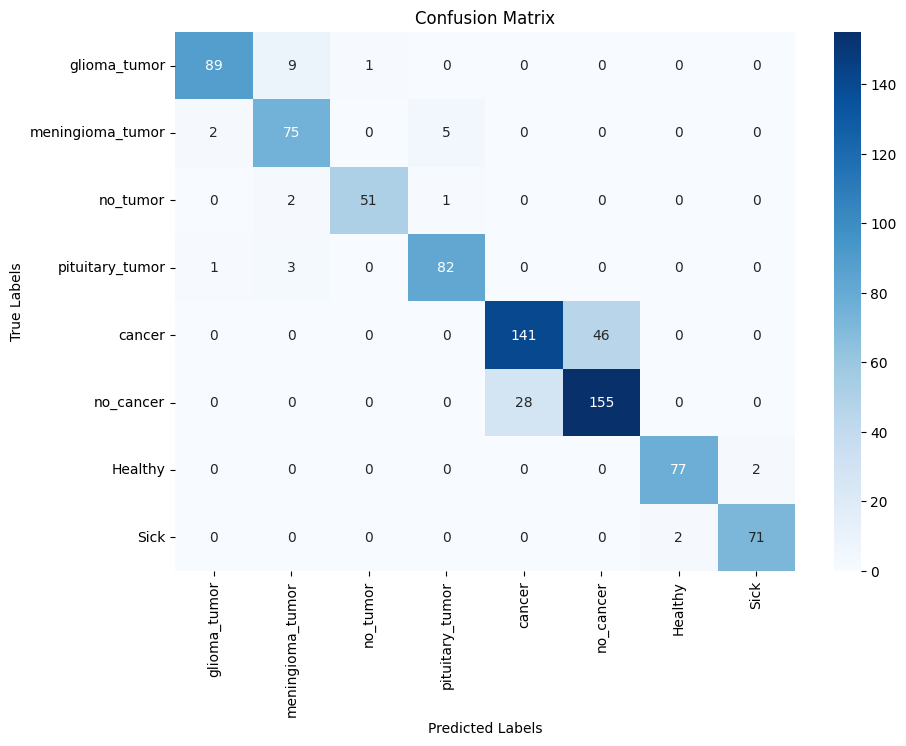

In [24]:
# Confusion Matrix Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

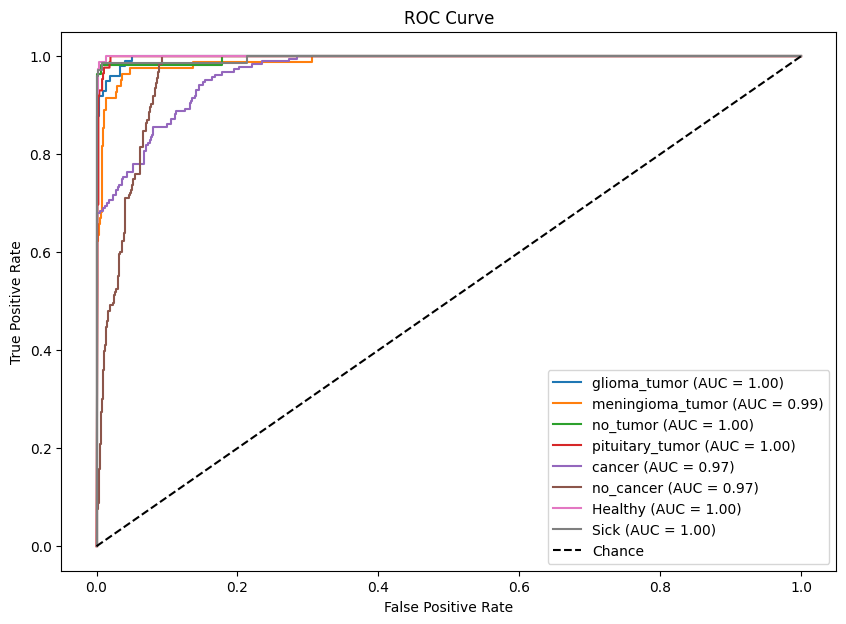

In [25]:
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(all_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(all_labels)):
    plt.plot(fpr[i], tpr[i], label=f"{all_labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

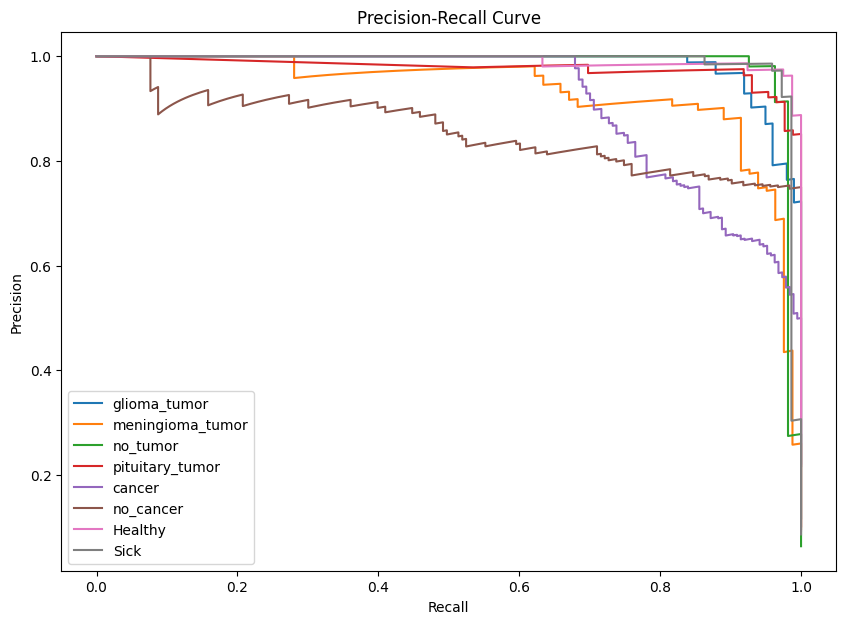

In [26]:
# Precision-Recall Curve
plt.figure(figsize=(10, 7))
for i in range(len(all_labels)):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f"{all_labels[i]}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [27]:
# Compute macro-average AUC
fpr_macro, tpr_macro, _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())
macro_auc = auc(fpr_macro, tpr_macro)
print("Macro-average AUC:", macro_auc)

# Compute overall accuracy
accuracy = np.mean(y_pred == y_true)
print("Overall Accuracy:", accuracy)

Macro-average AUC: 0.9928056707922718
Overall Accuracy: 0.8790035587188612
